#Аппроксимация значений температуры рядом Фурье

Подключаем библиотеки

In [ ]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (23,9)

#Грузим датасет. Его можно найти здесь:
https://drive.google.com/file/d/1coG3Daxocpe2G6-2Mvsz1v3oRzo_B8cq/view?usp=sharing

In [ ]:
# Загрузка датасета из CSV-файла
!gdown 1coG3Daxocpe2G6-2Mvsz1v3oRzo_B8cq
new_data = pd.read_csv('moscow_1975_2023_ok.csv')

In [ ]:
# Выберем строки, где дата больше или равна 1 января 2010 года
data = new_data[new_data['date'] >= '2010-01-01']

# Переиндексируем новый датафрейм
data = data.reset_index(drop=True)

In [ ]:
# Преобразование столбца с датой в объект datetime и установка его в качестве индекса
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data

,date,temperature
0,2010-01-01,-10.60
1,2010-01-02,-13.10
2,2010-01-03,-17.10
3,2010-01-04,-18.40
4,2010-01-05,-12.70
...,...,...
5057,2023-11-06,7.79
5058,2023-11-07,6.97
5059,2023-11-08,5.51
5060,2023-11-09,3.62


In [ ]:
df = data.copy()

In [ ]:
df.columns = ['date', 'y']

In [ ]:
df

,date,y
0,2010-01-01,-10.60
1,2010-01-02,-13.10
2,2010-01-03,-17.10
3,2010-01-04,-18.40
4,2010-01-05,-12.70
...,...,...
5057,2023-11-06,7.79
5058,2023-11-07,6.97
5059,2023-11-08,5.51
5060,2023-11-09,3.62


#График начиная с 01.01.2010 по 10.11.2023

<Axes: >

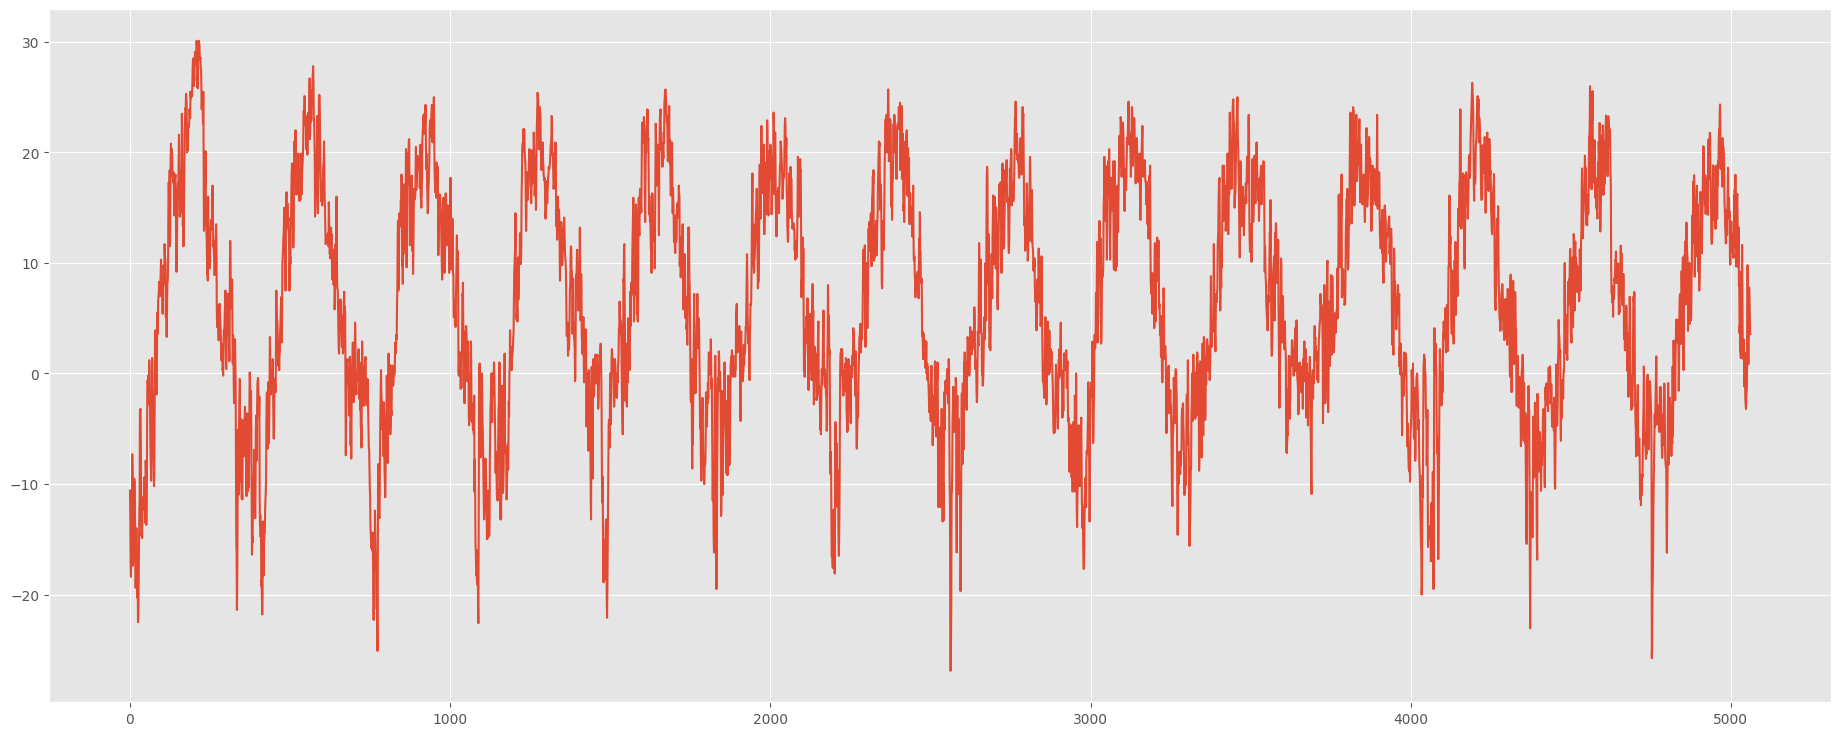

In [ ]:
df['y'].plot()

#Аппроксимация

In [ ]:
# Аппроксимация с помощью ряда Фурье
n = len(df)
t = np.arange(n)
k = 20  # количество компонент ряда Фурье для аппроксимации

y = df['y'].to_numpy()
c = fft(y)
c[k+1:-k+1] = 0  # устанавливаем нули для компонент, не участвующих в аппроксимации
y_approx = np.real(ifft(c))

In [ ]:
y_approx

array([-3.91513088, -4.07384542, -4.22847372, ..., -3.41514319,
       -3.58571098, -3.75239671])

In [ ]:
len(y_approx)

5062

In [ ]:
y_approx1 = pd.Series(y_approx)


<Axes: >

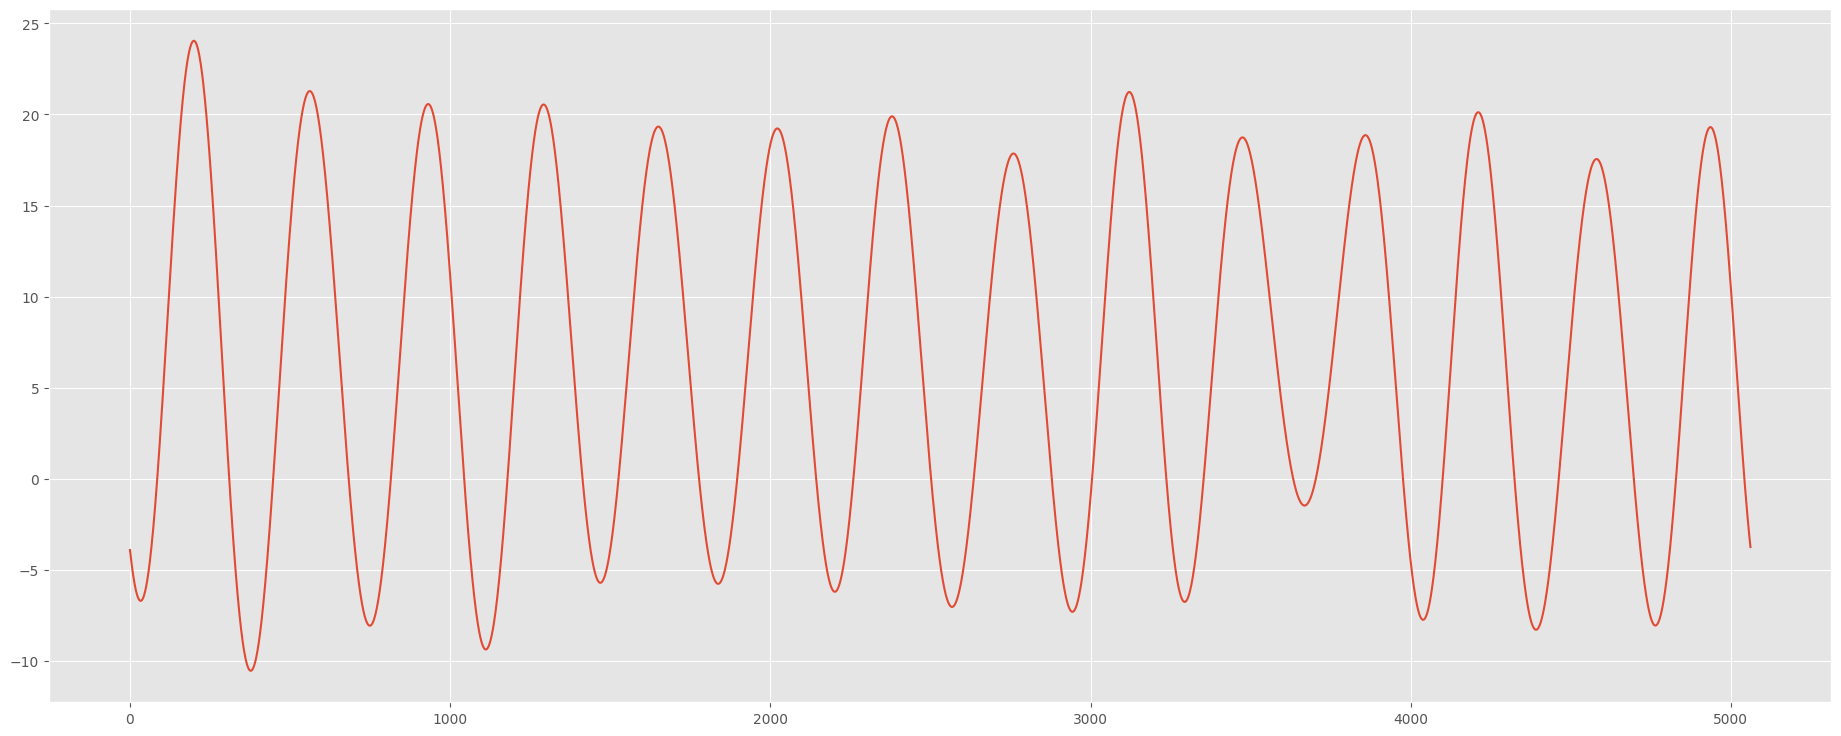

In [ ]:
y_approx1.plot()

# Продолжаем полученный ряд на 90 дней вперед

In [ ]:
# Продолжаем полученный ряд на 90 дней вперед
t_ext = np.arange(n + 90)
c_ext = np.zeros(n + 90, dtype=complex)
c_ext[:n] = c

# Получаем прогнозирование значений температуры
y_ext = np.real(ifft(c_ext))

# Теперь y_ext содержит аппроксимированные и прогнозированные данные
print(y_ext)

[-3.84673768 -4.32078421 -4.70484597 ... -1.9614203  -2.65809372
 -3.28972064]


In [ ]:
len(y_ext)

5152

In [ ]:
y_ext1 = pd.Series(y_ext)

In [ ]:
y_ext1

0      -3.846738
1      -4.320784
2      -4.704846
3      -4.993376
4      -5.182394
          ...   
5147   -0.416203
5148   -1.210303
5149   -1.961420
5150   -2.658094
5151   -3.289721
Length: 5152, dtype: float64

In [ ]:
data

,date,temperature
0,2010-01-01,-10.60
1,2010-01-02,-13.10
2,2010-01-03,-17.10
3,2010-01-04,-18.40
4,2010-01-05,-12.70
...,...,...
5057,2023-11-06,7.79
5058,2023-11-07,6.97
5059,2023-11-08,5.51
5060,2023-11-09,3.62


#Создаем датафрейм с датами и прогнозированными значениями

In [ ]:
import pandas as pd

# Создаём диапазон дат
dates = pd.date_range(start='01.01.2010', periods=len(y_ext1))

# Добавляем этот диапазон как новый столбец в DataFrame
y_ext1_df = y_ext1.to_frame()
y_ext1_df.insert(loc=0, column='Date', value=dates)
# Переименуем второй столбец на 'y'


In [ ]:
y_ext1_df.columns = ['Date', 'y']

In [ ]:
y_ext1_df

,Date,y
0,2010-01-01,-3.846738
1,2010-01-02,-4.320784
2,2010-01-03,-4.704846
3,2010-01-04,-4.993376
4,2010-01-05,-5.182394
...,...,...
5147,2024-02-04,-0.416203
5148,2024-02-05,-1.210303
5149,2024-02-06,-1.961420
5150,2024-02-07,-2.658094


#Строим графики
Видно, что период меняется со временем.

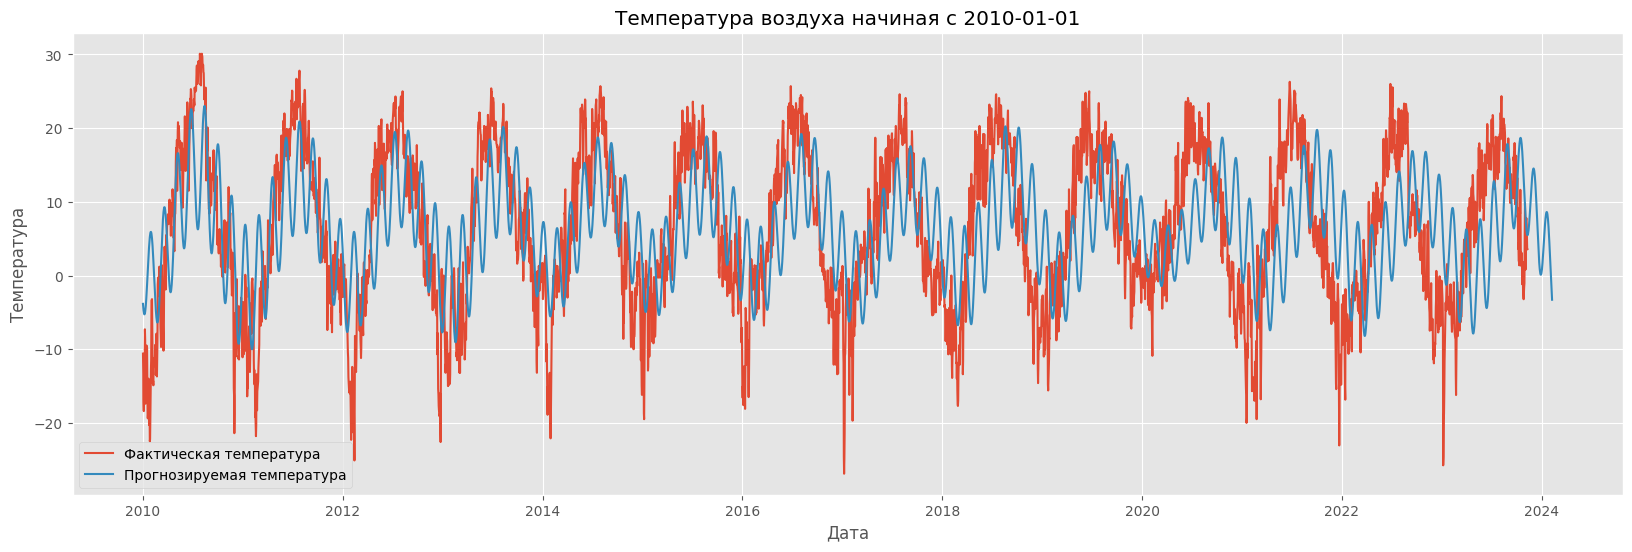

In [ ]:
plt.figure(figsize=(20, 6))

plt.plot(data['date'], data['temperature'])

plt.plot(y_ext1_df['Date'], y_ext1_df['y'])
plt.title('Температура воздуха начиная с 2010-01-01')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend(['Фактическая температура', 'Прогнозируемая температура'])
plt.show()

<Axes: >

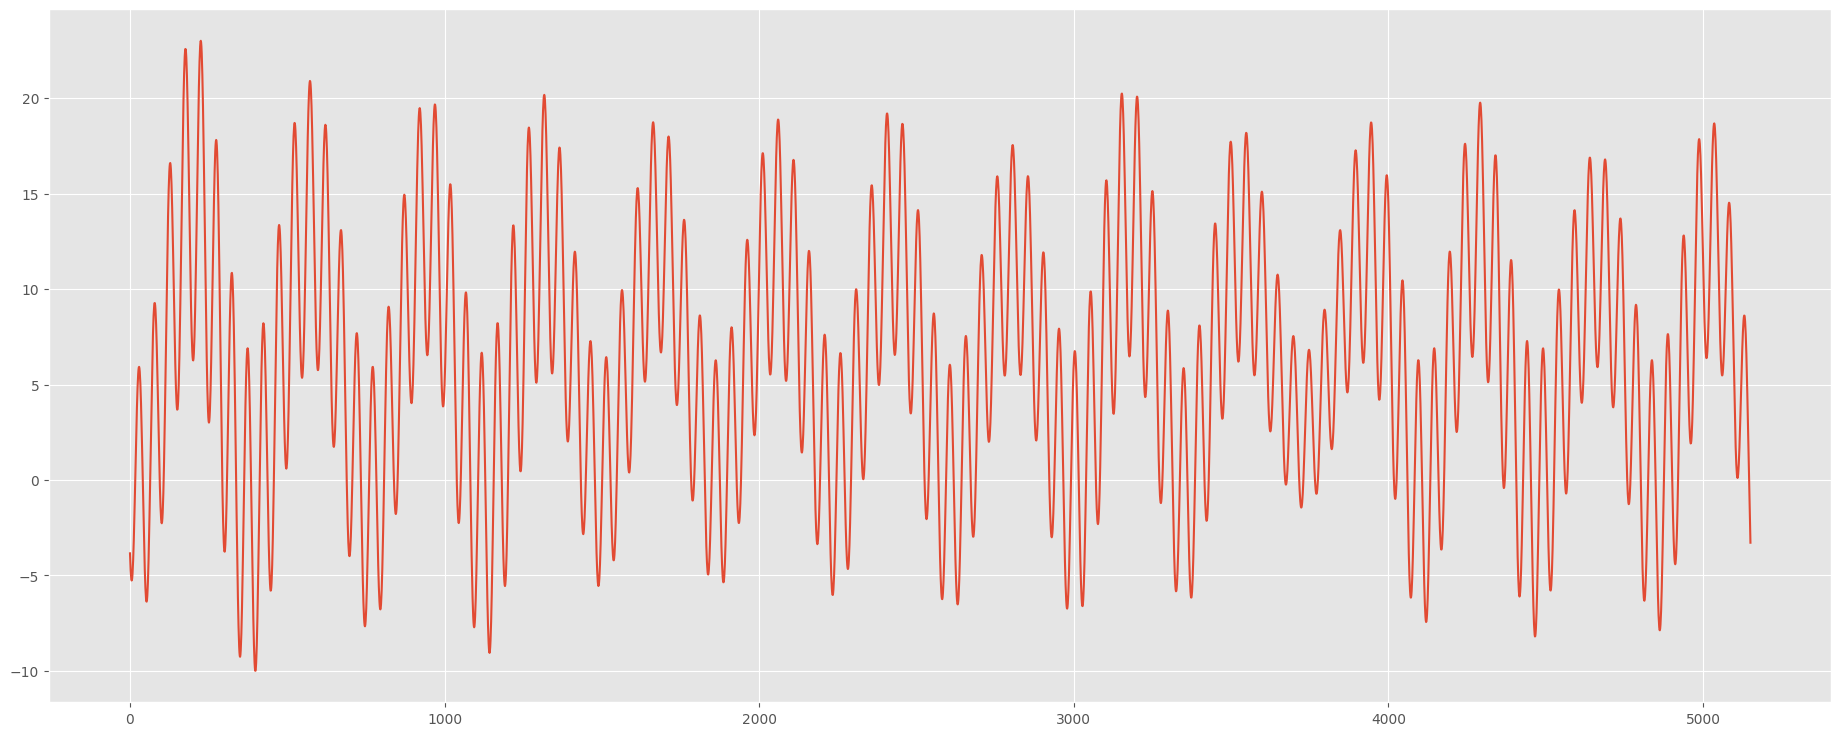

In [ ]:
y_ext1.plot()

#Делаем оценку точности прогноза

In [ ]:
from sklearn.metrics import mean_squared_error

# Предположим, что y_true - это ваш исходный ряд с реальными значениями
y_true = df['y']

# А y_pred - это предсказанные значения (для того же периода времени, что и y_true)
y_pred = y_ext1[:len(y_true)]

mse = mean_squared_error(y_true, y_pred)
print('MSE:', mse)

MSE: 93.95479318166063


# Сохраняем в csv файл предсказанные значения

In [ ]:
# Сохранение изменений обратно в CSV-файл
y_ext1.to_csv('fourier_predict.csv', index=False)

In [ ]:
import pandas as pd

# Создаём диапазон дат
dates = pd.date_range(start='01.01.2010', periods=len(y_ext1))

# Добавляем этот диапазон как новый столбец в DataFrame
y_ext1_df = y_ext1.to_frame()
y_ext1_df.insert(loc=0, column='Date', value=dates)

In [ ]:
# Переименуем второй столбец на 'y'
y_ext1_df.columns = ['Date', 'y']

In [ ]:
y_ext1_df

,Date,y
0,2010-01-01,-3.846738
1,2010-01-02,-4.320784
2,2010-01-03,-4.704846
3,2010-01-04,-4.993376
4,2010-01-05,-5.182394
...,...,...
5147,2024-02-04,-0.416203
5148,2024-02-05,-1.210303
5149,2024-02-06,-1.961420
5150,2024-02-07,-2.658094


In [ ]:
# Сохранение изменений обратно в CSV-файл
y_ext1_df.to_csv('2fourier_predict.csv', index=False)

#Метод средних значений

Идея такая - берем наш ряд (01.01.1975 - 10.11.2023). На интервале 01.09.2023 - 01.04.2024 делаем прогноз температуры на каждый день. Прогнозируемое значение температуры на каждую дату рассчитываем как среднее значение температур в соответствующий день года за весь период. Так, например, прогнозируемое значение температуры на 9 августа 2023г. будет равно среднему значению температур за 9 августа всех предыдущих лет. И так далее.

На интервале 01.09.2023 - 10.11.2023 у нас будут как реальные так и спрогнозированные значения температуры.

Сможем посчитать mse.

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
!gdown 1coG3Daxocpe2G6-2Mvsz1v3oRzo_B8cq
df = pd.read_csv('moscow_1975_2023_ok.csv')

df.columns = ['date', 'y']
# преобразуем столбец даты в формат datetime, если он еще не в таком формате
df['date'] = pd.to_datetime(df['date'])

# создаем новую колонку 'day_of_year', которая содержит день года для каждой даты
df['day_of_year'] = df['date'].dt.dayofyear

# группируем по дню года и рассчитываем среднюю температуру
mean_temp = df.groupby('day_of_year')['y'].mean()

# создаем новый датафрейм для прогноза
forecast_df = pd.DataFrame(pd.date_range(start='2023-09-01', end='2024-03-01'), columns=['date'])
forecast_df['day_of_year'] = forecast_df['date'].dt.dayofyear

# добавляем прогнозные значения температуры в новый датафрейм
forecast_df['forecast_temp'] = forecast_df['day_of_year'].map(mean_temp)
forecast_df.set_index('date', inplace=True)

# получаем реальные значения за период с 1 сентября 2023 года по 10 ноября 2023 года
actual_df = df[(df['date'] >= '2023-09-01') & (df['date'] <= '2023-11-10')].set_index('date')

# считаем среднюю квадратическую ошибку прогноза
mse = mean_squared_error(actual_df['y'], forecast_df.loc[actual_df.index, 'forecast_temp'])
rmse = sqrt(mse)
print('RMSE: ', rmse)
print('MSE: ', mse)

RMSE:  4.0971901068977665
MSE:  16.786966772060932


#Создаем датафрейм и записываем даты и спрогнозированные значения температуры в csv-файл

In [ ]:
forecast_df

,day_of_year,forecast_temp
date,,
2023-09-01,244,14.036531
2023-09-02,245,13.930612
2023-09-03,246,13.488163
2023-09-04,247,13.376122
2023-09-05,248,13.595918
...,...,...
2024-02-26,57,-4.799184
2024-02-27,58,-4.660816
2024-02-28,59,-4.714490


In [ ]:
forecast_df1 = forecast_df.reset_index().copy()
forecast_df1.columns = ['date','day', 'y']

In [ ]:
forecast_df1

,date,day,y
0,2023-09-01,244,14.036531
1,2023-09-02,245,13.930612
2,2023-09-03,246,13.488163
3,2023-09-04,247,13.376122
4,2023-09-05,248,13.595918
...,...,...,...
178,2024-02-26,57,-4.799184
179,2024-02-27,58,-4.660816
180,2024-02-28,59,-4.714490
181,2024-02-29,60,-4.606122


In [ ]:
# Сохранение изменений обратно в CSV-файл
forecast_df1.to_csv('method_mean.csv', index=False)

#Строим графики реальных и прогнозированных значений температуры

In [ ]:
# Загрузка датасета из CSV-файла
new_data = pd.read_csv('moscow_1975_2023_ok.csv')

In [ ]:
# Выберем строки, где дата больше или равна 1 января 2010 года
data1 = new_data[new_data['date'] >= '2020-09-01']

# Переиндексируем новый датафрейм
data1 = data1.reset_index(drop=True)

In [ ]:
# Преобразование столбца с датой в объект datetime и установка его в качестве индекса
data1['date'] = pd.to_datetime(data1['date'])

In [ ]:
data1

,date,temperature
0,2020-09-01,18.70
1,2020-09-02,14.90
2,2020-09-03,17.00
3,2020-09-04,17.50
4,2020-09-05,17.30
...,...,...
1161,2023-11-06,7.79
1162,2023-11-07,6.97
1163,2023-11-08,5.51
1164,2023-11-09,3.62


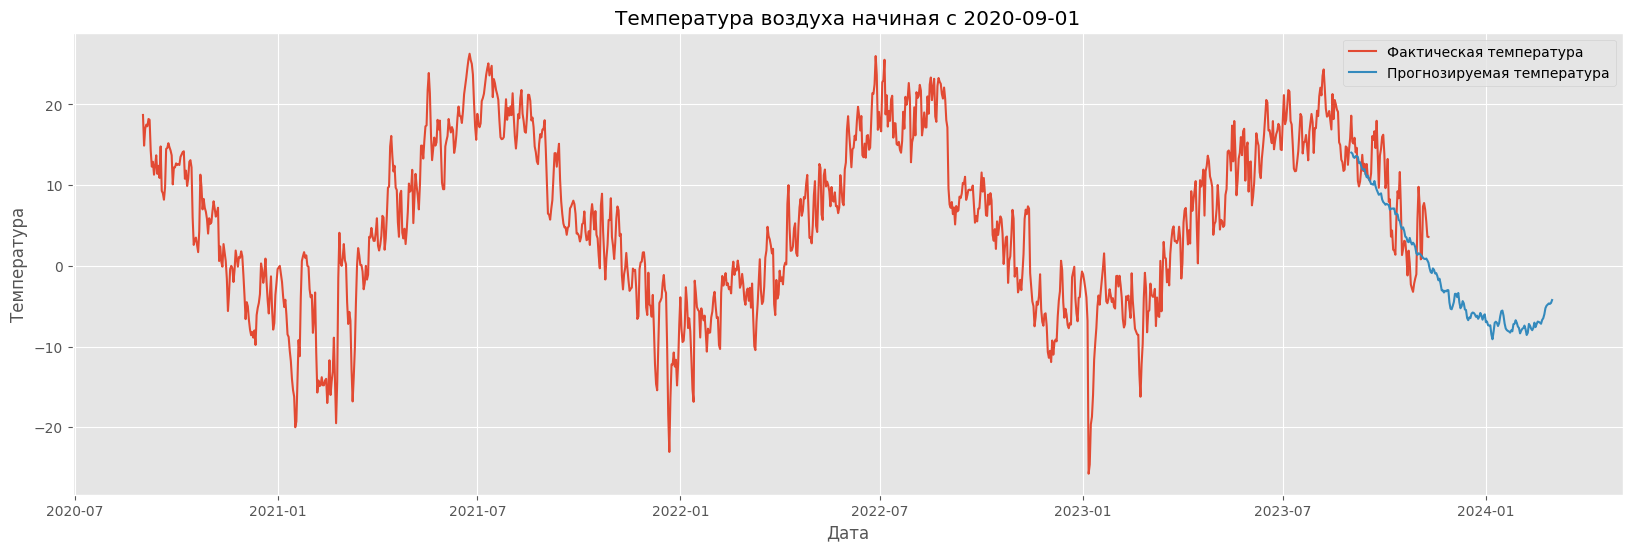

In [ ]:
plt.figure(figsize=(20, 6))

plt.plot(data1['date'], data1['temperature'])

plt.plot(forecast_df.index, forecast_df['forecast_temp'])
plt.title('Температура воздуха начиная с 2020-09-01')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend(['Фактическая температура', 'Прогнозируемая температура'])
plt.show()